## 1. Gradient Descent ##

- Gradient Descent is an optimization algorithm for finding a local minimum of a differentiable function. Gradient descent in machine learning is simply used to find the values of a function's parameters (coefficients) that minimize a cost function as far as possible.

- refer to Neural Networks and Deep Learning.ipynb for gradient descent calculus

In [ ]:
import pandas as pd
import numpy as np
import math
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("test_scores.csv").drop(columns="name").values.tolist()
print(df)

def gradient_descent(x,y):
    m_curr = b_curr = 0
    iterations = 1000000
    n = len(x)
    learning_rate = 0.0002
    cost_previous = 0

    for i in range(iterations):
        y_predicted = m_curr*x + b_curr
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        md = -2/n * (sum(x*(y-y_predicted)))
        bd = -2/n * (sum(y-y_predicted))
        m_curr = m_curr - learning_rate*md
        b_curr = b_curr - learning_rate*bd
        if math.isclose(cost, cost_previous, rel_tol=1e-20):
            break
        cost_previous = cost
        print("m {}, b {}, cost{}, iteration {}".format(m_curr, b_curr, cost, i))

x = [int(i[0]) for i in df]
y = [int(i[1]) for i in df]
print(x, y)
gradient_descent(np.array(x), np.array(y))

def predict_using_sklearn():
    df = pd.read_csv("test_scores.csv")
    r = LinearRegression()
    r.fit(df[['math']],df.cs)
    return r.coef_, r.intercept_

m_sklearn, b_sklearn = predict_using_sklearn()
print("Using sklearn: Coef {} Intercept {}".format(m_sklearn,b_sklearn))

- Gradient descent with multiple features (x1, x2) (dot product)

In [ ]:
def sigmoid_numpy(X):
   return 1/(1+np.exp(-X))

sigmoid_numpy(np.array([12,0,1]))

def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

def gradient_descent(age, affordability, y_true, epochs, loss_thresold):
    w1 = w2 = 1
    bias = 0
    rate = 0.5
    n = len(age)
    for i in range(epochs):
        weighted_sum = w1 * age + w2 * affordability + bias
        y_predicted = sigmoid_numpy(weighted_sum)
        loss = log_loss(y_true, y_predicted)

        w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true))
        w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true))

        bias_d = np.mean(y_predicted-y_true)
        w1 = w1 - rate * w1d
        w2 = w2 - rate * w2d
        bias = bias - rate * bias_d

        print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

        if loss<=loss_thresold:
            break

    return w1, w2, bias

gradient_descent(X_train_scaled['age'],X_train_scaled['affordibility'],y_train,1000, 0.4631)

In [ ]:
coef, intercept

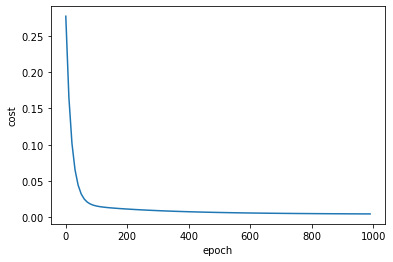

- Batch gradient descent: use all training samples for one forward pass and then adjust weights; good for small training set (the 2 code examples above)

- Stochastic gradient descent (SGD): use one randomly picked sample for a forward pass and then adjust weights; good when training set is very big and not much computation is wanted

- Mini batch gradient descent: use a batch of randomly picked samples for a forward pass and then adjust weights (intermediate version of batch GD and stochastic GD)

https://www.youtube.com/watch?v=IU5fuoYBTAM&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=14&ab_channel=codebasics

In [ ]:
# we will use random libary to pick random training sample.
import random
random.randint(0,6) # randit gives random number between two numbers specified in the argument

In [ ]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]

        y_predicted = np.dot(w, sample_x.T) + b

        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.square(sample_y-y_predicted)

        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = SGD(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

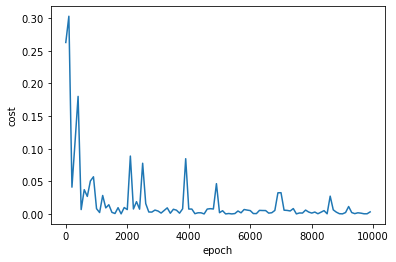

## 2. Storing models ##

In [ ]:
import pickle

In [ ]:
# with open('filename', 'wb') as f:
#   pickle.drop(model, f)

# with open ('filename', 'rb') as f:
#   model = pickle.load(f)

## 3. Linear Regression ##

- Linear regression is a data analysis technique that predicts the value of unknown data by using another related and known data value. It mathematically models the unknown or dependent variable and the known or independent variable as a linear equation.

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
reg = LinearRegression()
reg.fit(df[['area']], df.price)
reg.predict(5000)

In [ ]:
reg.coef_

In [ ]:
reg.intercept_

In [ ]:
plt.xlabel('name', fontsize=20)
plt.ylabel('name', fontsize=20)
plt.scatter(df.area, df.price)
plt.plot(df.area, reg.predict(area))

## 4. Multivariable Regression ##


In [ ]:
reg.fit(df[['area'], ['bedrooms'], ['age']], df.price)
reg.predict([[3000], [3], [40]])

## 5. Dummy variables & One Hot Encoding ##


- Machine learning models can only work with numerical values. For this reason, it is necessary to transform the categorical values of the relevant features into numerical ones. This process is called feature encoding.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

Method 1: pandas

In [ ]:
dummies = pd.get_dummies(df.form)
merged = pd.concat([df, dummies], axis='columns')

# Removing the original columns of data (without encoding)
final = merged.drop(['town', 'west_windsor'], axis='columns', inplace=True)

Method 2: sklearn

In [ ]:
le = LabelEncoder()
dfle = df
dfle.town = le.fit_transform(dfle.town)
X = dfle[['town', 'area']].values
y = dfle.price

In [ ]:
ohe = OneHotEncoder(categorical_feaures=[0])
X = ohe.fit_transform(X).toarray()
X = X[:,1:]     # drop 1st column to avoid dummy trap
# model.fit(X,y)

In [ ]:
# Extra: convert numpy array to python list
# xxxx.tolist()

## 6. Training and testing data ##

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

## 7. Logistic Regression ##

1. Binary Classification

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits

In [ ]:
model = LogisticRegression()
# model.fit(X_train, y_train)
# model.predict_proba(X_test)

2. Multiclass classification


In [ ]:
digits = load_digits()
# dir(digits)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)
# model.predict([digits.data[6]])

## 8. Data preprocessing, exploration and visualization ##

1. Filling NaN data (numerical) with mean/median value

In [ ]:
import math

In [ ]:
median_bedrooms = math.floor(df.bedrooms.median())
df.bedrooms = df.bedrooms.fillna(median_bedrooms)

2. Convert text to numbers (e.g. five --> 5)

In [ ]:
pip install word2number

In [ ]:
from word2number import w2n

In [ ]:
w2n.word_to_num('five')

5

3. Assessing which categories are most important in determing the dependent variable

- Compare mean values of different categories and their respective outputs
- Example: most employers with low satisfaction level left the company; compare satisfaction level of retained/left employers
- It can be found out that the satisfactoin level of retained employers are generally higher (mean value) than those the ones who left

In [ ]:
# Dummy variable created
# Employers who left
print(df[df.left==1])

# Employers who retained
print(df[df.left==0])

# Finding out mean value of satisfaction level of the 2 groups: left and retained
print(df.groupby('left').mean())

4. Filtering unimportant data by deleting columns in a pandas Dataframe

In [ ]:
# subdf = df [['...', '...', '...']]

## 9. Decision Tree ##

- High information gain vs low information gain
- Gini Impurity
- Low entropy is better than high entropy (randomness)
- Prone to overfitting (use random forest to alleviate the problem)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Preprocessing Data
# inputs = df.drop(['...'], axis='columns')
# targets = df['...']
# le_company = LabelEncoder()
# inputs['company_n'] = le_company.fit_transform(inputs['company'])
# inputs_n = inputs.drop(['company', '...'], axis='columns')

In [ ]:
model = DecisionTreeClassifier()
# model.fit(inputs_n, target)

## 10. Support Vector Machine (SVM)

- Definition: SVM draws a hyperplane in an n-dimensional space such that it maximizes margin between classification groups

- Gamma: hyperparameter used in SVMs with kernel functions (low gamma = larger area around each data point, smaller decision boundary; high gamma: influence is limited to smaller area, may lead to overfitting)

- Regulaization: technique used to prevent overfitting by adding a penalty for larger coefficients in the model (r parameter C controls the trade-off between achieving low training error and maximizing simpler model)

- Kernel: function that transforms the input data into higher dimensional space; allows algorithms to find linear decision boundaries in this new features space

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(C=4, gamma='auto', kernel='rbf')
model.fit(X_train, y_train)
model.score(X_test, y_test)

## 11. Random forest

- Mechanism: take data and divide it into batch of random data to build multiple decision tree

- Data is classified according to majority vote by multiple decision trees

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators=40)   # n_estimators = n number of decision trees

- Note that performance of model increases with number of decision trees (n_estimators), but it comes with the expense of increased computational cost of training and predicting

- Random forest are usually better than decision trees except for: a) small datasets/simpler problems b) low computational cost

## 12. K-Fold Cross Validation ##

- Mechanism: the data set is divided into a number of K-folds and used to evaluate the model's performance as new data become available

- Can be used to assess different machine learning models (e.g. Logistic Regression vs SVC vs RandomForest)

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score

- Splitting data

In [ ]:
kf = KFold(n_splits=3)
df = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for train_index, test_index in kf.split(df):
  print(train_index, test_index)

[4 5 6 7 8 9] [0 1 2 3]
[0 1 2 3 7 8 9] [4 5 6]
[0 1 2 3 4 5 6] [7 8 9]


- Evaluating model performance (Method 1)

In [ ]:
def get_score(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  return model.score(X_test, y_test)

fold = StratifiedKFold(n_splits=3)
scores_LR = []
scores_SVM = []
scores_RF = []

for train_index, test_index in kf.split(digits.data):
  X_train, X_test, y_train, y_test = \
  digits.data[train_index], digits.data[test_index], digits.target[train_index], digits.target[test_index]
  get_score(LogisticRegression('...'), X_train, X_test, y_train, y_test)
  get_score(SVC('...'), X_train, X_test, y_train, y_test)
  get_score(RandomForestClassifier('...'), X_train, X_test, y_train, y_test)

# Outputs a list of scores of n trials
# Find the best model by calculating the highest average score of each model

- Evaluating model performance (Method 2) (MUCH FASTER)

In [ ]:
cross_val_score(LogisticRegression(), digits.data, digits.target)
cross_val_score(SVC(), digits.data, digits.target)
cross_val_score(RandomForestClassifier(), digits.data, digits.target)

# Outputs a list of scores of n trials
# Find the best model by calculating the highest average score of each model

## 13. K means Clustering

- Simple definition: a technique used to organize data into groups based on their similarity
- Unsupervised Learning (no target variable/class variable; only a set of features given)

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

df = pd.read_csv("income.csv")

- Note that data must be scaled properly in preprocessing stage so that the correct clusters can be obtained

In [ ]:
# Data preprocessing
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [ ]:
df.head()

In [ ]:
plt.scatter(df.Age,df['Income($)'])

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

In [ ]:
df['cluster']=y_predicted
print(km.cluster_centers_)
df.head()

In [ ]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

- How can we determine the optimal k value? We use the elbow plot. The elbow of the graph indicates the optimal k value.
- SSE = sum of squared errors

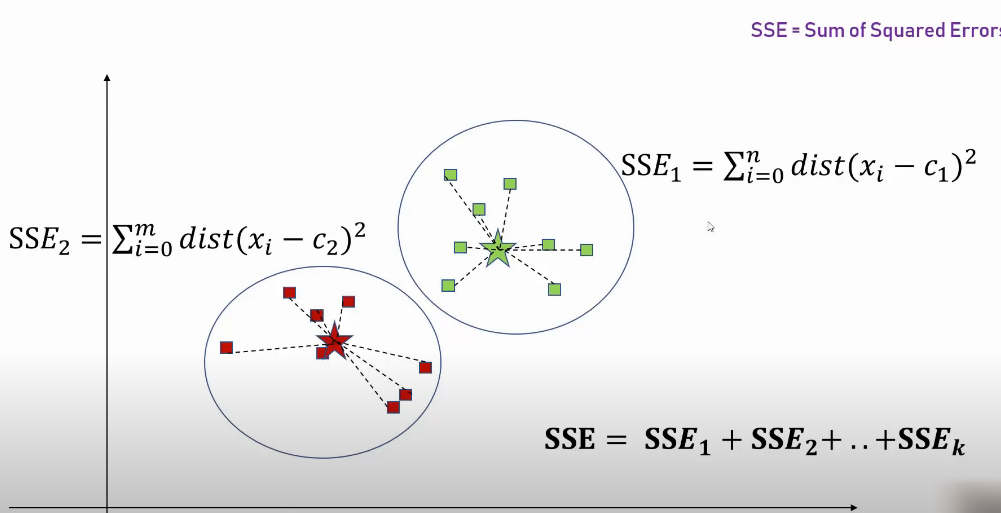

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

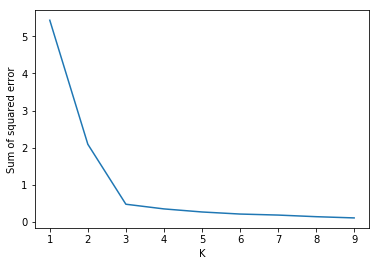


## 14. Naive Bayes Classifier ##

- Definition: an algorithm which uses the principles of probability (Bayes' Theorem) to perform classification tasks

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

1. Predicting survival from titanic crash (GaussianNB)



In [ ]:
# Data preprocessing

df = pd.read_csv("titanic.csv")

# Removing useless data columns, identifying inputs and target variables
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
inputs = df.drop('Survived',axis='columns')
target = df.Survived

# Creating dummy variables
dummies = pd.get_dummies(inputs.Sex)
dummies.head(3)
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head(3)
inputs.drop(['Sex','male'],axis='columns',inplace=True)     # Dummy variable trap
inputs.head(3)

# Filling NaN age data with mean age value
inputs.columns[inputs.isna().any()]
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)

In [ ]:
cross_val_score(GaussianNB(),X_train, y_train, cv=5)

2. Email spam detector (Multinomial NB)


In [ ]:
# Data preprocessing
df = pd.read_csv("spam.csv")

# Grouping spam/non-spam emails
df.groupby('Category').describe()

# Creating dummy variables (spam = 1, non-spam = 0)
df['spam'] = df['Category'].apply(lambda x: 1 if x=='spam' else 0)

- CountVectorizer is a text preprocessing technique commonly used in natural language processing (NLP) tasks for converting a collection of text documents into a numerical representation

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

In [ ]:
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
# X_train_count.toarray()[:2]

In [ ]:
model = MultinomialNB()
model.fit(X_train_count,y_train)

In [ ]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

In [ ]:
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

- Pipelines bundle all preprocessing and modeling steps into a single object. This makes your code cleaner and easier to manage.


In [ ]:
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [ ]:
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

## 15. Hyper parameter Tuning ##

- Definition: identifying a set of optimal hyperparameters (e.g. C, gamma, n_estimators, n_splits) for a learning algorithm for a specific model

- Approach 1: use train_test_split and manualy tune parameters by trial and error

- Approach 2: use k fold cross validation

- Approach 3 (BEST): use GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
clf = GridSearchCV(SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(iris.data, iris.target)

In [ ]:
df = pd.DataFrame(clf.cv_results_)
print( clf.best_params_, clf.best_score_, dir(clf))

- Alternatively, use RandomizedSearchCV to reduce number of iterations and with random combination of parameters. This is useful when you have too many parameters to try and your training time is longer. It helps reduce the cost of computation

In [ ]:
rs = RandomizedSearchCV(SVC(gamma='auto'), {
        'C': [1,10,20],
        'kernel': ['rbf','linear']
    },
    cv=5,
    return_train_score=False,
    n_iter=2
)
rs.fit(iris.data, iris.target)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

- Determining different hyperparameters of different models

In [ ]:
# Example: SVC vs RF vs LR

model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(iris.data, iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

## 16. Weight Regularization

- Definition of Regularization: a method to balance overfitting and underfitting a model during training

- Mechanism: adds a penalty term to the loss function to discourage the model from fitting the training data too closely. This helps improve generalization to unseen data.

- L1 regularization penalizes the sum of absolute values of the weights; use if a) you a sparse model b) you need feature selection. c) the dataset has many irrelevant features.

- L2 regularization (weight decay) penalizes the sum of squares of the weights; use if a) you want all features to contribute b) the dataset has correlated features c) you want to prevent overfitting without eliminating features.

- Elastic net regulaization is useless when you want a balance between sparsity and smoothness

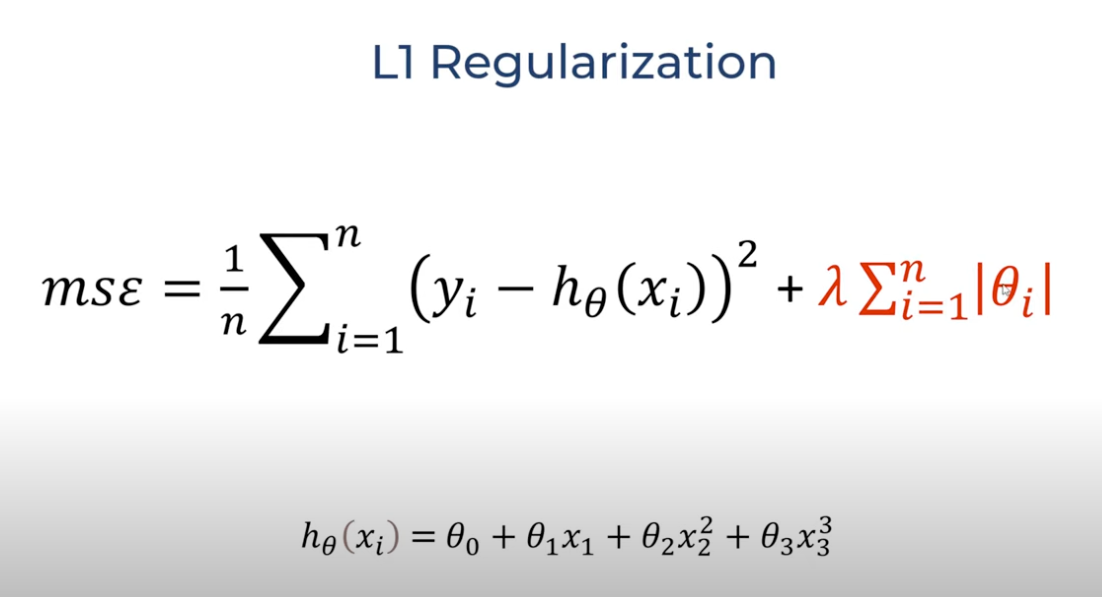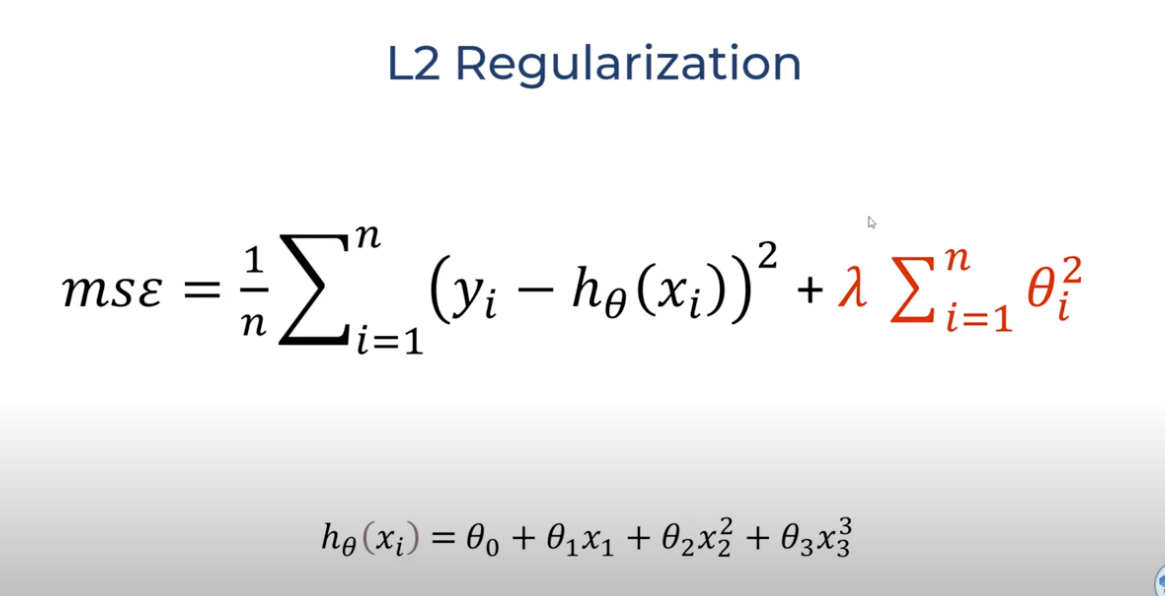


In [ ]:
from sklearn import linear_model
from sklearn.linear_model import Ridge

In [ ]:
# Data preprocessing

dataset = pd.read_csv('./Melbourne_housing_FULL.csv')

# Step 1: filtering unimportant data
cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount',
               'Distance', 'CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']
dataset = dataset[cols_to_use]
# print(dataset.head(), dataset.nunique(), dataset.shape, dataset.isna().sum())

# Step 2: identifying columns with NaN data; handling missing values
cols_to_fill_zero = ['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']

# a) treat missing values as zero
dataset[cols_to_fill_zero] = dataset[cols_to_fill_zero].fillna(0)

# b) replace missing values with mean values
dataset['Landsize'] = dataset['Landsize'].fillna(dataset.Landsize.mean())
dataset['BuildingArea'] = dataset['BuildingArea'].fillna(dataset.BuildingArea.mean())

# c) removing NaN values directly
dataset.dropna(inplace=True)

# Step 3: dummy encoding
dataset = pd.get_dummies(dataset, drop_first=True)

# Step 4: train_test_split
X = dataset.drop('Price', axis=1)
y = dataset['Price']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=2)

In [ ]:
reg = LinearRegression().fit(train_X, train_y)
print(reg.score(test_X, test_y), reg.score(train_X, train_y))

- When the testing score is much lower than the training score, we can use regularization (e.g. 13% << 66%)

In [ ]:
# Lasso regression model (L1 regularized)

lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(train_X, train_y)
lasso_reg.score(test_X, test_y)

In [ ]:
# Ridge regression model (L2 regularized)

ridge_reg = Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(train_X, train_y)
ridge_reg.score(test_X, test_y)

## 17. K nearest neighbours classifcation ##

- Definition: a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

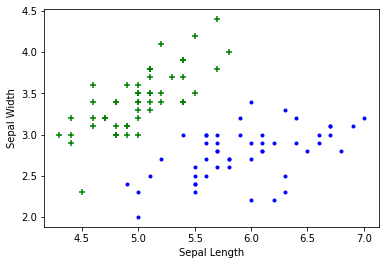


## 18. Principal Component Analysis (PCA) ##

- Definition: a process of figuring out most important features or principal components that has the most impact on the target variable (unsupervised learning). It is a dimensionality reduction technique.

- Advantages: faster training and inference, data visulization becomes easier

- Few things in mind before using PCA:

  * Always scale features before applying PCA (using MinMaxScaler or StandardScaler)
  * Accuracy might drop (less information is retained)

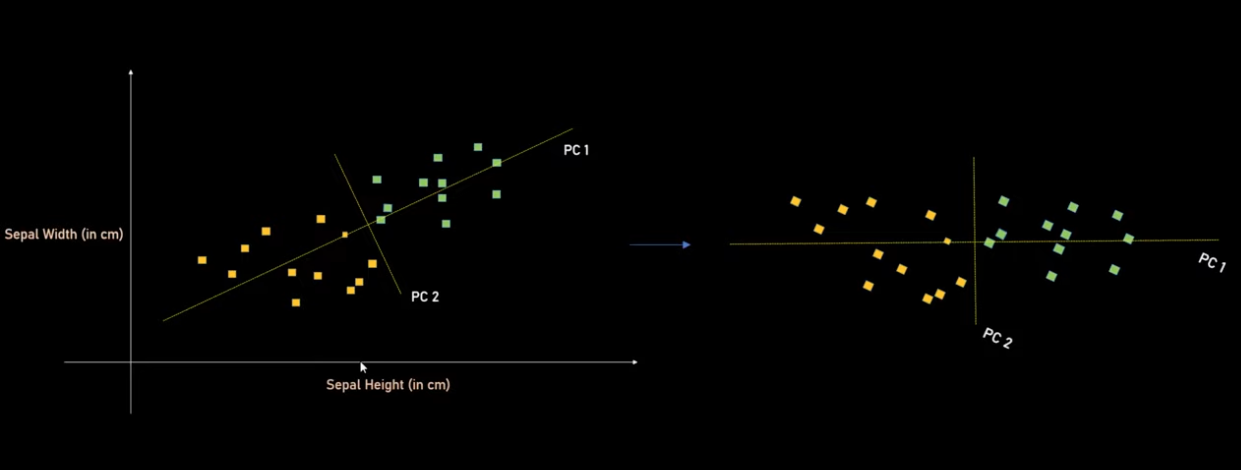

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# Data preprocessing

dataset = load_digits()
print(dataset.keys(), dataset.data.shape, dataset.data[0])
dataset.data[0].reshape(8,8)
# plt.matshow(dataset.data[9].reshape(8,8))
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

X = df
y = dataset.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
# Example 1: Retaining 95% of useful features
pca = PCA(0.95)
X_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_, pca.n_components_)

# PCA created 29 components out of 64 original columns (1797, 64) --> (1797, 29)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

In [ ]:
# Example 2: selecting only 2 components/ 27% of important feature information
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

- Note that the accuracy of example 2 decreases drastically (~60%) as using only 2 components did not retain mcuh of the feature information.
- However in real life you will find many cases where using 2 or few PCA components can still give you a pretty good accuracy

## 19. Bias and Variance ##

- Variance: **test error** varying based on selection of training dataset (e.g. high variance = test error varies greatly depending on training dataset selected)

- Bias: a measurement of how accurately a model can capture of apattern in a traning dataset (higher **train error** = higher bias)

- Underfitting: high bias, low variance

- Overfitting: high variance, low bias

- Balanced fit: low variance, low bias

- Ways to get balanced fit model:

*   Cross Validation
*   Regularization
*   Dimensionality Reduction (e.g. PCA)
*   Ensemble Techniques (Bagging and boosting)

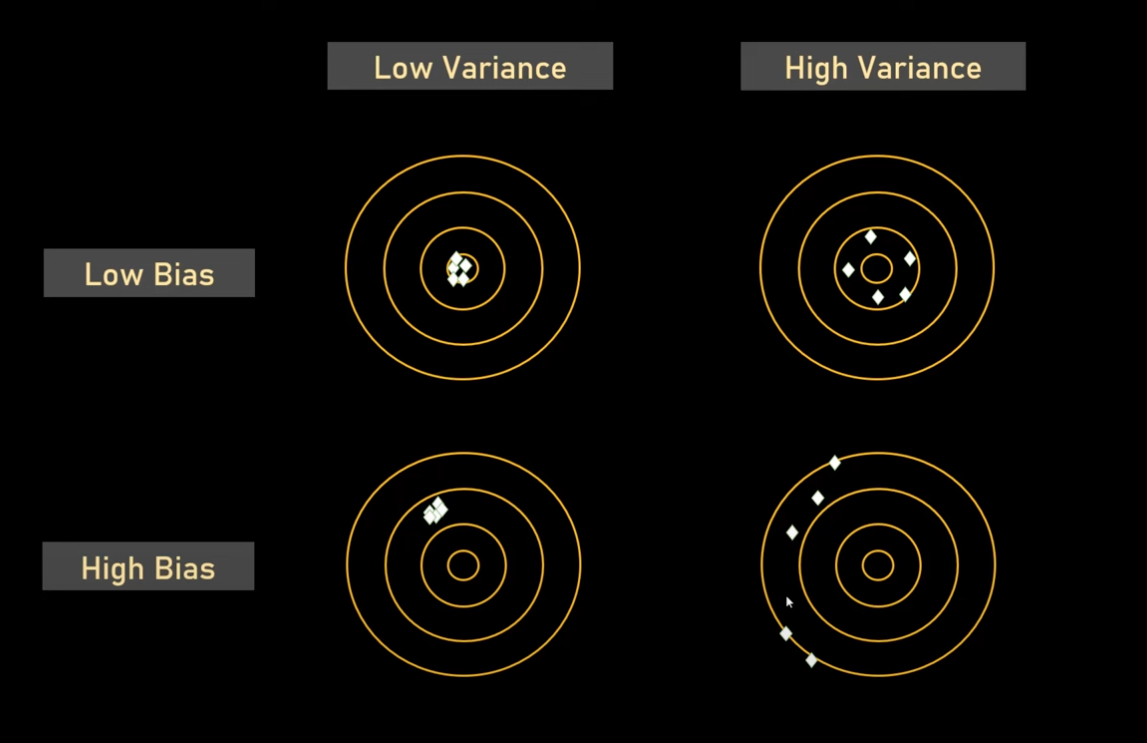

## 20. Ensemble Learning (Bagging and Boosting) ##

- Ensemble methods are powerful techniques that combine multiple models to improve predictive performance

1. Bagging (Bootstrap aggregation): involves training multiple models independently and combining their predictions through averaging (regression) or voting (classification) (**parallel**)

  *   Objective: reduce variance, prevent overfitting
  *   Examples: Random forest
  *   Advantages: reduce overfitting by averaging out the noise; works well with high-variance models; less prone to overfitting
  *   Disadvantages: may not improve the performance of low variance base models
  *   Use when you have high-variance models and want to stabilize their predictions.



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

- Note that data must be scaled before it is bagged

In [ ]:
# Data preprocessing

df = pd.read_csv("diabetes.csv")
print(df.isnull().sum())
print(df.describe())
print(df.Outcome.value_counts())    # 500 people without diabetes, 268 people with diabetes

X = df.drop('Outcome', axis='columns')
y = df.Outcome

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]

In [ ]:
# Training using stand alone model

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10)
print(X_train.shape, X_test.shape, y_train.value_counts(), y_test.value_counts())

scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
print(scores, scores.mean())    # 71.2%

In [ ]:
# Training using bagging

bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,          # oob = out of bag (treating data sample in none of the bags as test data)
    random_state=0
)
bag_model.fit(X_train, y_train)
scores = cross_val_score(bag_model, X, y, cv=5)     # cv=5 means 5 folds
print(bag_model.oob_score_, scores.mean())  # 75.3%, 75.8%

In [ ]:
# Training using Random Forest

scores = cross_val_score(RandomForestClassifier(n_estimators=50), X, y, cv=5)
scores.mean()   # 76.2%

2. Boosting: builds models **sequentially**, where each subsequent model corrects the errors of its predecessor. Final prediction is a weighted sum (regression) or weighted vote (classification) of all base models

  *   Objective: reduce bias, improve accuracy
  *   Examples: AdaBoost, Gradient Boosting, XGBoost
  *   Advantages: improves accuracy by focusing on hard-to-predict instances; can achieve high performance with relatively simple base models
  *   Disadvantages: **more prone to overfitting if not properly regularized**, computationally more expensive and harder to parallelize compared to bagging
  *   Use when you have high-bias models and want to improve their predictive accuracy (e.g. classification/regression problems, complex non-linear relationships like image/speech recognition)

In [1]:
from sklearn.tree import DecisionTreeClassifier
X = [[0, 0], [1, 1]]
y = [0, 1]
model = DecisionTreeClassifier()
model.fit(X, y)
print(model.predict([[2, 2]]))

[1]


## 21. Performance metrics ##

- Different metrics for classification and regression tasks

- Prerequisites:
  * Threshold: a cutoff value used to convert predicted probabilities into discrete class labels (e.g. threshold = 0.5, predicted = 0.7, classified as +ve)
    * Lower threshold: more instances are classified as +ve; improves recall, reduces precision (vice versa)
    * Different thresholds are useful in scenarios where the cost of false positives and false negatives varies
    * Medical diagnosis: missing a disease (false -ve) are most costly than false alarms; lower threshold is preferred
    * Spam detection: legitimate emails marked as spam (false +ve) are most costly than spam emails missed (false -ve); higher threshold is preferred (maximize precision)
    * When choosing threshold, consider cost of FP/FN. Consider ROC/Precision-Recall Curve of F1 score
  * Imbalanced datasets: situations where the distribution of samples across different classes is highly unequal
    * Fraud detection (many legitimate transactions vs. few fraudulent ones; Medical diagnosis (healthy patients vs. those with a rare disease; Anomaly detection (normal events vs. rare outliers)
    * May lead to model bias, misleading accuracy, and poor generalization
    * Can be tackled with resampling techniques (oversampling/undersampling) or evaulation metrics (explained below)

- Classification Metrics
  * 1. Accuracy: the ratio of correctly predicted instances to the total instances; used when classes are balanced
  * 2. Precision (P) [ TP / (TP + FP) ]: the ratio of correctly predicted positive instances to the total predicted positive instances; used when cost of false positives is high (e.g. spam detection)
  * 3. Recall (R) [ TP / (TP + FN) ]: the ratio of correctly predicted positive instances to the total actual positive instances; used when the cost of false negatives is high (e.g. medical diagnosis)
  * 4. F1 score [ 2 x (P x R) / (P + R) ]: the harmonic mean of precision and recall; used when a balance is neded between precision and recall, especially in imbalanced datasets
  * 5. Confusion Matrix: a table which describes the performance of a classifcation model  (TP, TN, FP, TN); provides a comprehensive view of model's performance (however it is based on binary predictions and does not reflect the model's confidence/probabilities)
  * 6a. Receiver Operating Characteristic (ROC) curve: plots the true positive rate (recall) against the false positive rate (precision) at various threshold settings
  * 6b. Area Under the Curve (AUC): measures the entire area under the ROC curve; used to evaluate performance at different thresholds

- Regression Metrics
  * 1. Mean Absolute Error (MAE): the average of the absolute differences between predicted and actual values; provides a straightforward measure of error magnitude
  * 2. Mean Sqaured Error (MSE): the average of the squared differences between predicted and actual values; penalizes larger errors more heavily, useful when large errors are particularly undesirable.
  * 3. Root Mean Squared Error (RMSE): provides error in the same units as the target variable, making it easier to interpret
  * 4. R-squared: the proportion of the variance in the dependent variable that is predictable from the independent variables; indicates the goodness of fit of the model

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Provides a summary of precision, recall, F1 score and support for each class

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## 22. Other optimizer techniques ##

- SGD: explained in part 1

- Momentum: Momentum adds a term that considers the previous weight updates, which helps accelerate the convergence in directions of persistent reduction in the loss.

- Adagrad (Adaptive Gradient Algorithm): an optimizer that adapts the learning rate for each parameter based on the historical gradients. It is particularly useful for dealing with sparse data.

- RMSprop: RMSprop modifies the learning rate for each parameter based on the moving average of the squared gradients (an extension to Adagrad)

**How RMSprop extends Adagrad**

- Adagrad decreases the learning rate for each parameter based on the accumulated squared gradients, which can lead to overly small updates over time.
RMSprop introduces a moving average of the squared gradients, allowing the learning rate to remain more stable and effective throughout training.

- (Adagrad adapts the learning rates based solely on the historical gradients, which can lead to premature convergence.
RMSprop balances the adaptation by considering only the recent gradients through the moving average, avoiding the rapid decay seen in Adagrad.)

- Adam (Adaptive Moment Estimation): Adam combines both momentum and RMSprop, maintaining a moving average of both the gradients and their squared values.

**All the optimization techniques discussed, including SGD, Momentum, Adagrad, RMSprop, and Adam, rely fundamentally on the principles of backpropagation.**


## 23. Backpropagation ##

- Definition: Backpropagation is an algorithm used to compute the gradient of the loss function with respect to the weights of the neural network. It utilizes the chain rule of calculus to propagate gradients backward through the network layers.
- Purpose: The primary goal of backpropagation is to update the weights so as to minimize the loss function, thereby improving the model's performance.

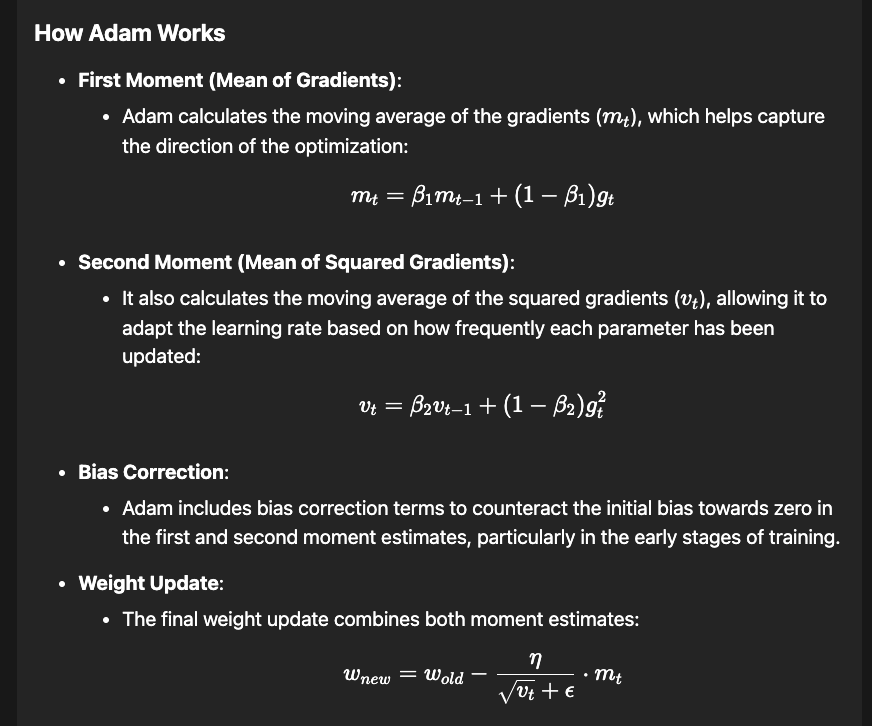

## Miscellaneous questions ##

#### **Linear Regression**
1. What is the difference between simple linear regression and multivariable regression?
2. How do you interpret the coefficients in a linear regression model?

#### **Logistic Regression**
3. Why is logistic regression used for classification instead of linear regression?
4. What is the sigmoid function, and how does it work in logistic regression?

#### **Decision Trees**
5. What is the Gini index, and how is it used in decision trees?
6. How does pruning help prevent overfitting in decision trees?

#### **Random Forests**
7. What is bagging, and how does it improve model performance?
8. How does a random forest handle overfitting compared to a single decision tree?

#### **SVM**
9. What is the kernel trick in SVM, and why is it useful?
10. How does the choice of kernel (e.g., linear, RBF) affect SVM performance?

#### **k-Means Clustering**
11. What is the elbow method, and how is it used to determine the optimal number of clusters?
12. What are the limitations of k-means clustering?

#### **PCA**
13. What is the purpose of PCA, and how does it reduce dimensionality?
14. How do you interpret the principal components?

#### **Hyperparameter Tuning**
15. What is the difference between grid search and random search?
16. How do you choose the best hyperparameters for a model?


## Suggested Answers ##

### Linear Regression
1. **Difference**: Simple linear regression involves one independent variable predicting a dependent variable, while multivariable regression uses multiple independent variables to predict the same dependent variable.
2. **Interpretation**: Coefficients represent the expected change in the dependent variable for a one-unit increase in the independent variable, holding other variables constant.

### Logistic Regression
3. **Usage**: Logistic regression is used for classification because it predicts probabilities of class membership, outputting values between 0 and 1, unlike linear regression which can produce values outside this range.
4. **Sigmoid Function**: The sigmoid function transforms any input value into a value between 0 and 1, allowing logistic regression to model the probability of a binary outcome.

### Decision Trees
5. **Gini Index**: The Gini index measures the impurity of a dataset; in decision trees, it helps determine the best split by calculating the impurity of each potential split and choosing the one with the lowest Gini index.
6. **Pruning**: Pruning reduces the size of the tree by removing sections that provide little predictive power, thereby preventing overfitting and improving the model’s generalization to new data.

### Random Forests
7. **Bagging**: Bagging, or bootstrap aggregating, involves training multiple models on random subsets of the data and averaging their predictions, which reduces variance and improves model stability.
8. **Handling Overfitting**: A random forest reduces overfitting by averaging predictions from many decision trees, each trained on different data subsets, thus mitigating the tendency of a single tree to fit noise.

### SVM
9. **Kernel Trick**: The kernel trick allows SVM to operate in a high-dimensional space without explicitly computing coordinates, making it easier to find non-linear decision boundaries.
10. **Kernel Choice**: The choice of kernel affects SVM performance by determining how data is transformed; linear kernels are suitable for linearly separable data, while RBF kernels can handle complex, non-linear relationships.

### k-Means Clustering
11. **Elbow Method**: The elbow method involves plotting the within-cluster sum of squares against the number of clusters, identifying the point where additional clusters provide diminishing returns, indicating the optimal number of clusters.
12. **Limitations**: k-means clustering assumes spherical clusters of equal size, is sensitive to initial centroid placement, and struggles with outliers, potentially leading to suboptimal clustering.

### PCA
13. **Purpose of PCA**: PCA reduces dimensionality by transforming data into a set of orthogonal principal components that capture the most variance, simplifying analysis and visualization.
14. **Interpreting Principal Components**: Principal components represent linear combinations of original features, with the first component explaining the most variance, helping identify underlying patterns in the data.

### Hyperparameter Tuning
15. **Grid Search vs. Random Search**: Grid search exhaustively tests all combinations of specified hyperparameters, while random search samples a subset of combinations, often leading to faster and sometimes better results.
16. **Choosing Hyperparameters**: The best hyperparameters are selected based on performance metrics (e.g., accuracy, F1 score) evaluated through cross-validation, ensuring the model generalizes well to unseen data.